<a href="https://colab.research.google.com/github/sudarshanregmi369/PRODIGY_ML_02/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [57]:
data = pd.read_csv('/content/Mall_Customers.csv')
# print(data)
#we are renaming the columns

data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
new_data = data.rename(columns = {'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'})
print(new_data)
#checking for the null value in data
#Looking for null values
nulls= new_data.isna().sum( )
print(':',nulls)


     CustomerID  Gender  Age  AnnualIncome  SpendingScore
0             1       1   19            15             39
1             2       1   21            15             81
2             3       0   20            16              6
3             4       0   23            16             77
4             5       0   31            17             40
..          ...     ...  ...           ...            ...
195         196       0   35           120             79
196         197       0   45           126             28
197         198       1   32           126             74
198         199       1   32           137             18
199         200       1   30           137             83

[200 rows x 5 columns]
: CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


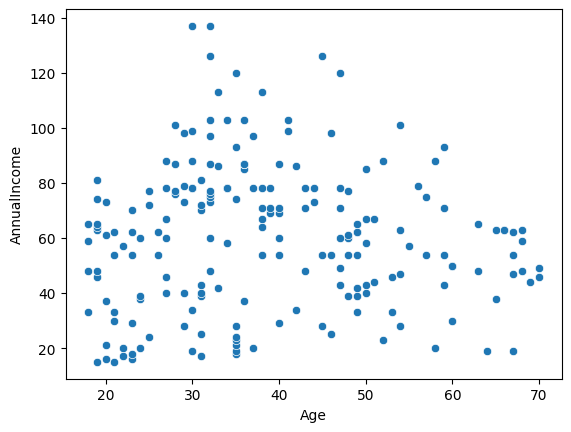

In [58]:
#findinf the relationship annual income with different age group
sns.scatterplot(data=new_data, x="Age", y="AnnualIncome")
plt.show()



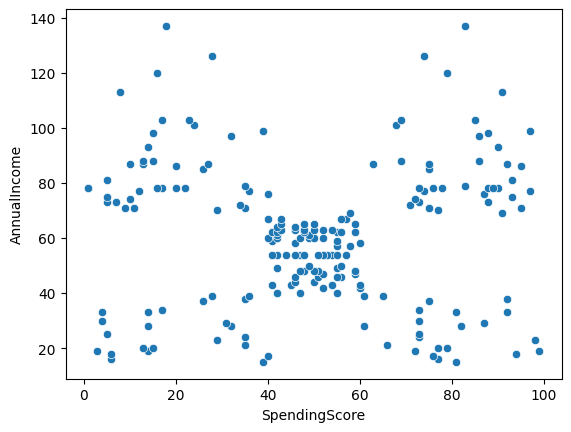

In [59]:
sns.scatterplot(data=new_data, x="SpendingScore", y="AnnualIncome")
plt.show()

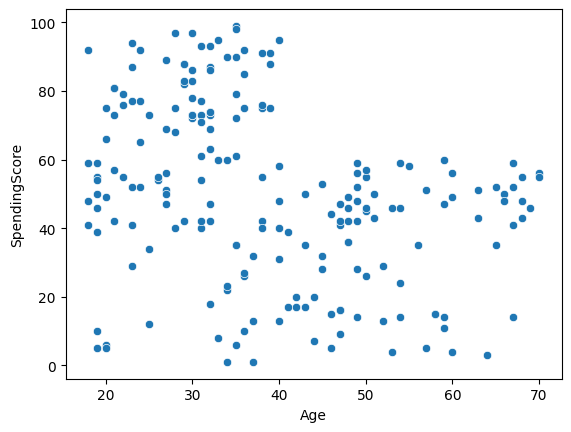

In [60]:
#for age and spendscore
sns.scatterplot(data=new_data, x="Age", y="SpendingScore")
plt.show()

<ipython-input-61-6bde9ee0a718>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[i], bins=20)
<ipython-input-61-6bde9ee0a718>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[i], bins=20)
<ipython-input-61-6bde9ee0a718>:9: UserWarning: 

`distplot` is a deprecated function and 

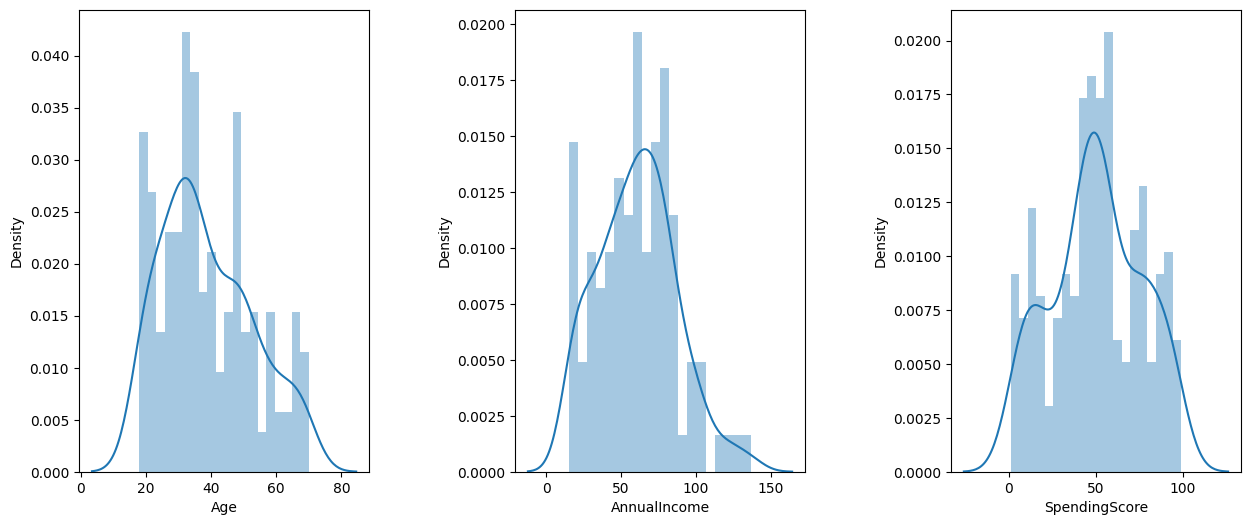

In [61]:
#. Data Visualization
plt.figure(1 , figsize = (15 , 6))
feature_list =["Age","AnnualIncome","SpendingScore"]
# feature_list = ["Age", "Annual Income", "Spending Income"]
pos = 1
for i in feature_list :
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(new_data[i], bins=20)
    pos = pos + 1
plt.show()

0    112
1     88
Name: Gender, dtype: int64

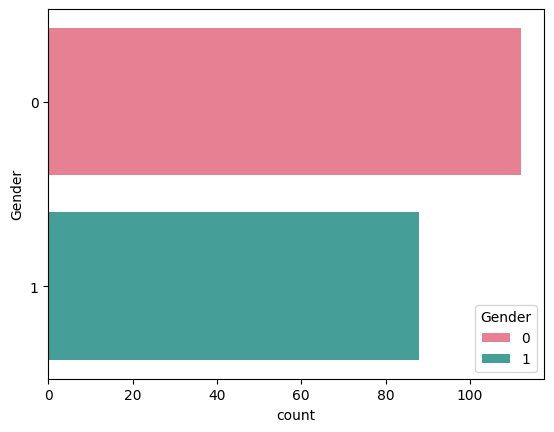

In [62]:
#Count and plot gender
sns.countplot(y = 'Gender', data = new_data, palette="husl", hue = "Gender")
new_data["Gender"].value_counts()

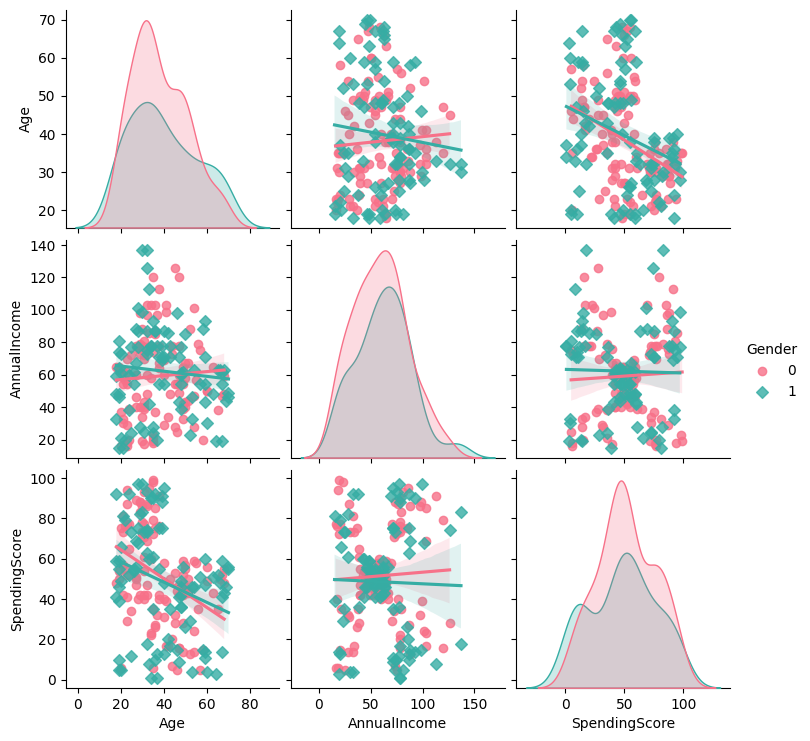

In [63]:
# Pairplot with variables we want to study
sns.pairplot(new_data, vars=["Age", "AnnualIncome", "SpendingScore"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

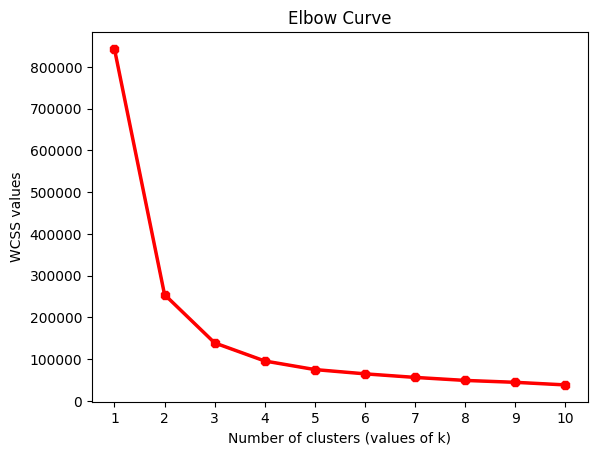

In [65]:
for column in new_data.columns:
    if new_data[column].dtype == "object":
        print(column, new_data[column].unique())
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)

# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()